In [16]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv('/Users/a_ssu/git/EDA/snsb.csv')
df_gen = pd.read_csv('/Users/a_ssu/git/EDA/gen_data_snsb.csv')

df['Avg_SNSB'] = df[['SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial', 'SNSB_Memory', 'SNSB_Frontal']].mean(axis=1)
df_gen['Avg_SNSB'] = df_gen[['SNSB_Attention', 'SNSB_Language', 'SNSB_Visuospatial', 'SNSB_Memory', 'SNSB_Frontal']].mean(axis=1)

In [51]:
df.columns

Index(['DID', 'Sex(M=1, F=2)', 'Hypertension', 'Diabete', 'Hyperlipidemia',
       'Alchol', 'Smoking', 'CDR', 'GDS', 'MMSE_Reg', 'MMSE_Time',
       'MMSE_Place', 'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage',
       'MMSE_Drawing', 'MMSE_Total', 'Age', 'Education', 'SNSB_Attention',
       'SNSB_Language', 'SNSB_Visuospatial', 'SNSB_Memory', 'SNSB_Frontal',
       'Type'],
      dtype='object')

In [10]:
df_gen.describe()

,DID,"Sex(M=1, F=2)",Hypertension,Diabete,Hyperlipidemia,Alchol,Smoking,CDR,GDS,MMSE_Reg,...,MMSE_Lanugage,MMSE_Drawing,MMSE_Total,Age,Education,SNSB_Attention,SNSB_Language,SNSB_Visuospatial,SNSB_Memory,SNSB_Frontal
count,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.84878,1.541463,0.443902,0.453659,0.487805,0.468293,0.341463,0.839024,3.726829,2.980488,...,6.819512,0.653659,21.643902,71.600000,8.943162,29.892453,34.825011,22.758370,10.630002,16.926516
std,59.54609,0.499498,0.498059,0.499067,0.501075,0.500215,0.475361,0.786491,1.238085,0.138655,...,1.089887,0.476968,5.734743,10.001765,4.545569,22.369163,27.737028,26.529197,20.319073,24.074747
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,3.000000,0.000000,8.000000,42.000000,0.000000,0.050011,0.010000,0.010000,0.010000,0.010000
25%,52.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,3.000000,3.000000,...,6.000000,0.000000,19.000000,66.000000,6.000000,10.865045,6.081841,0.374818,0.364711,0.472801
50%,103.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,4.000000,3.000000,...,7.000000,1.000000,23.000000,72.000000,8.960808,27.283371,33.290687,7.446607,2.666218,5.763132
75%,154.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,...,8.000000,1.000000,26.000000,79.000000,12.000000,44.727004,58.758593,45.083290,9.363119,21.599686
max,205.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,3.000000,...,8.000000,1.000000,30.000000,87.000000,19.999977,87.604600,89.379975,86.469966,85.839857,94.989955


<Axes: xlabel='Sex(M=1, F=2)', ylabel='CDR'>

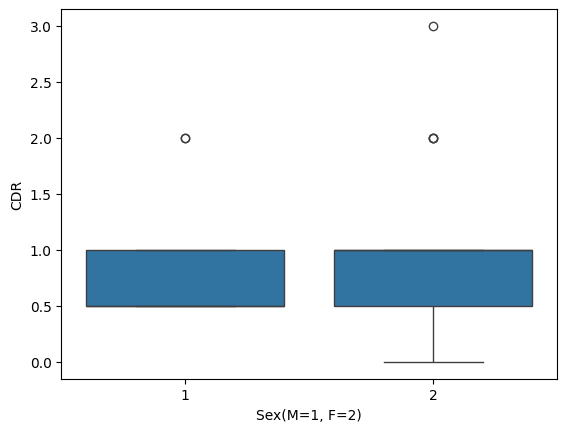

In [13]:
sns.boxplot(data=df, x='Sex(M=1, F=2)', y='CDR')

<Axes: xlabel='Sex(M=1, F=2)', ylabel='CDR'>

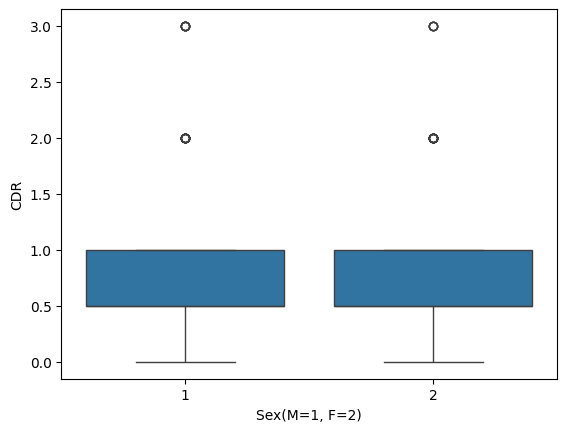

In [14]:
sns.boxplot(data=df_gen, x='Sex(M=1, F=2)', y='CDR')

<Axes: xlabel='Sex(M=1, F=2)', ylabel='CDR'>

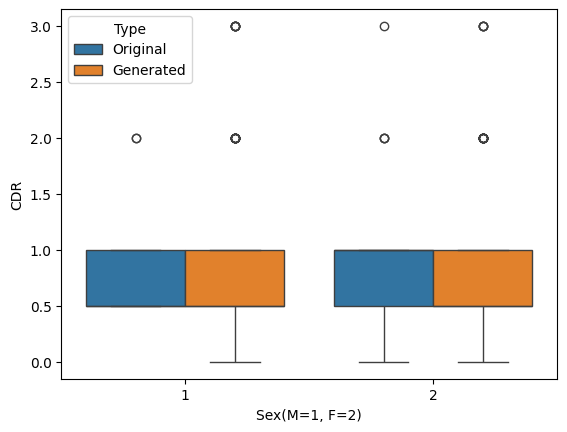

In [20]:
# 데이터프레임에 'Type' 열 추가 (원본은 'Original', 생성된 것은 'Generated')
df['Type'] = 'Original'
df_gen['Type'] = 'Generated'

# 두 데이터프레임을 합치기
combined_df = pd.concat([df, df_gen])

combined_df.describe()
# boxplot 그리기
# plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Sex(M=1, F=2)', y='CDR', hue='Type')
# plt.show()

In [191]:
column = []
values = []
types = []
sexs = []

df_plot = None

def appending(label):
    for idx in range(len(df[label])):
        
        one = df[label].iloc[idx]
        sex = df['Sex(M=1, F=2)'].iloc[idx]
        sex = '_M' if sex == 1 else '_F'
        column.append(label)
        values.append(one)
        types.append('origin'+sex)
        sexs.append(sex)
        
    for idx in range(len(df_gen[label])):
        
        one = df_gen[label].iloc[idx]
        sex = df_gen['Sex(M=1, F=2)'].iloc[idx]
        sex = '_M' if sex == 1 else '_F'
        column.append(label)
        values.append(one)
        types.append('generated'+sex)
        sexs.append(sex)

# appending('CDR')
# appending('GDS')

def target_boxploting(target_list, rotate):
    column.clear()
    values.clear()
    types.clear()
    sexs.clear()
    
    for one_label in target_list:
        appending(one_label)

    df_plot = pd.DataFrame(data=[column, values, types, sexs], index=['Features', 'Value', 'Type', 'Sex'])
    df_plot = df_plot.transpose()
    
    f, ax = plt.subplots()
    plt.xticks(rotation=rotate)
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # sns.set_theme(style="whitegrid")
    sns.set_palette('Set2')
    sns.boxplot(data=df_plot, x='Features', y='Value', hue='Type', legend=False)
    sns.stripplot(df_plot, x="Features", y="Value", size=4, color=".3")
    # sns.despine(bottom=True, left=True)
    
    # sns.stripplot(data=df_plot, x='Value', y='Features', hue='Type', legend=False, dodge=True, alpha=.25, zorder=1)
    
    # Calculate mean values for each category
    # mean_values = df_plot.groupby(['Features', 'Type'])['Value'].mean().reset_index()

    # # Plot mean values using pointplot
    # sns.pointplot(
    #     data=mean_values, x='Value', y='Features', hue='Type',
    #     dodge=.8, palette="dark", markers="d", markersize=4, linestyle="none", ci=None
    # )?
    
    # sns.pointplot(
    #         data=df_plot, x='Value', y='Features', hue='Type',
    #         dodge=.8, palette="dark", errorbar=None,
    #         markers="d", markersize=4, linestyle="none",
    #     )
    # sns.move_legend(
    #     ax, loc="lower right", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
    # )
    # plt.legend(labels=["Origin_F", "Origin_M", "Generated_F", 'Generate_M'], loc=2, bbox_to_anchor=(1, 1))
    plt.show()
    


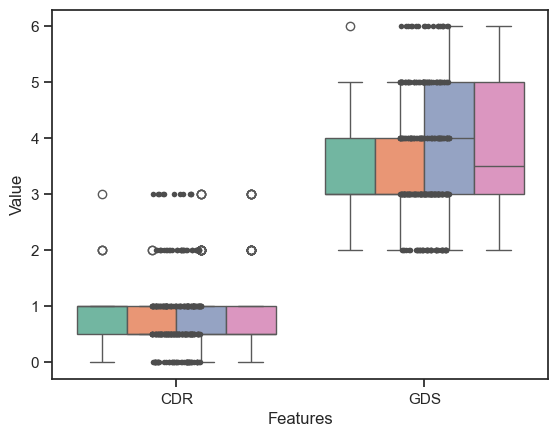

In [192]:
target_boxploting(['CDR','GDS'], rotate=0)

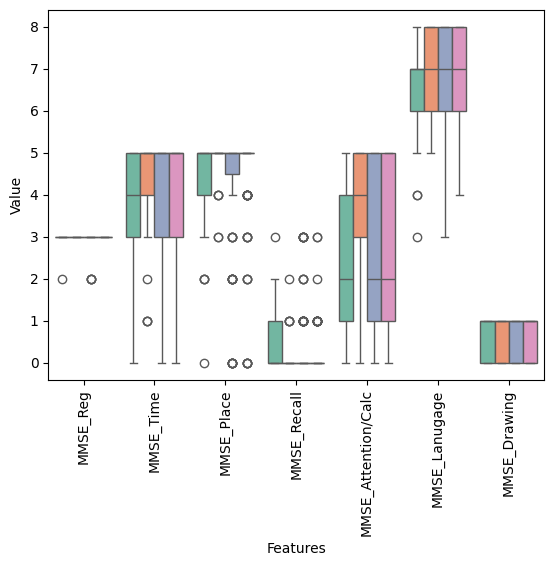

In [95]:
target_boxploting(['MMSE_Reg', 'MMSE_Time',
       'MMSE_Place', 'MMSE_Recall', 'MMSE_Attention/Calc', 'MMSE_Lanugage',
       'MMSE_Drawing'], 90)

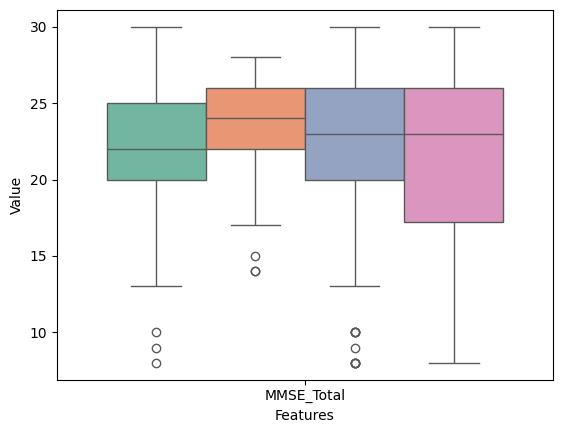

In [96]:
target_boxploting(['MMSE_Total'], 0)

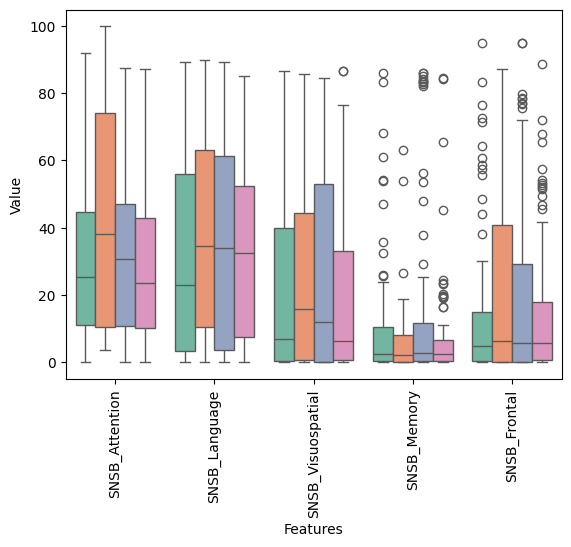

In [97]:
target_boxploting(['SNSB_Attention',
       'SNSB_Language', 'SNSB_Visuospatial', 'SNSB_Memory', 'SNSB_Frontal'], 90)

In [99]:
origin_CG = df[['CDR', 'GDS']]
gen_CG = df_gen[['CDR', 'GDS']]

In [100]:
ori_CG_corr = origin_CG.corr()
gen_CG_corr = gen_CG.corr()

<Axes: >

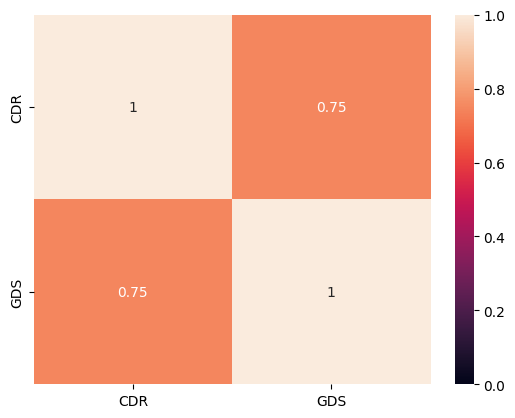

In [104]:
sns.heatmap(ori_CG_corr, annot=True, vmin=0)

<Axes: >

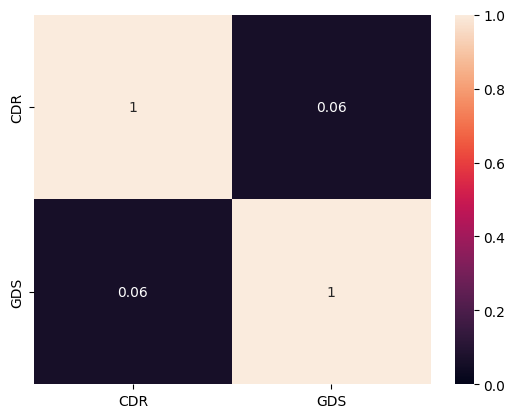

In [105]:
sns.heatmap(gen_CG_corr, annot=True, vmin=0)

In [178]:
sns.set_theme(style="ticks")


In [177]:
# sns.(data=origin_CG)
sns.jointplot(x=origin_CG['CDR'], y=origin_CG['GDS'], kind="hex", color="#4CB391")

KeyError: 'GDS'

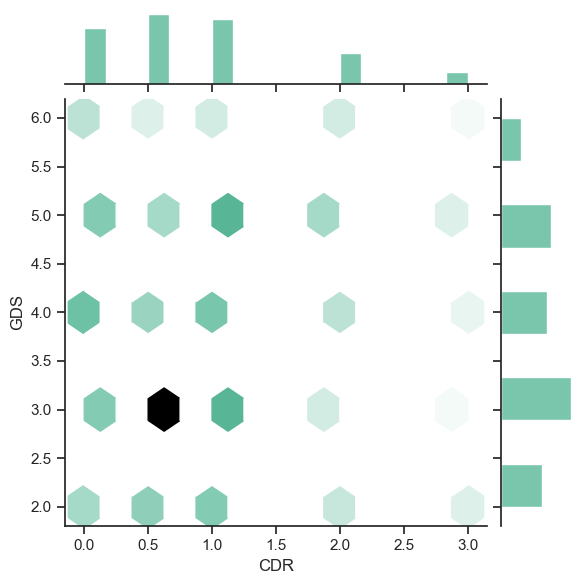

In [110]:
sns.jointplot(x=gen_CG['CDR'], y=gen_CG['GDS'], kind="hex", color="#4CB391")

In [160]:
origin_CG = df[['CDR', 'MMSE_Total']]
gen_CG = df_gen[['CDR', 'MMSE_Total']]

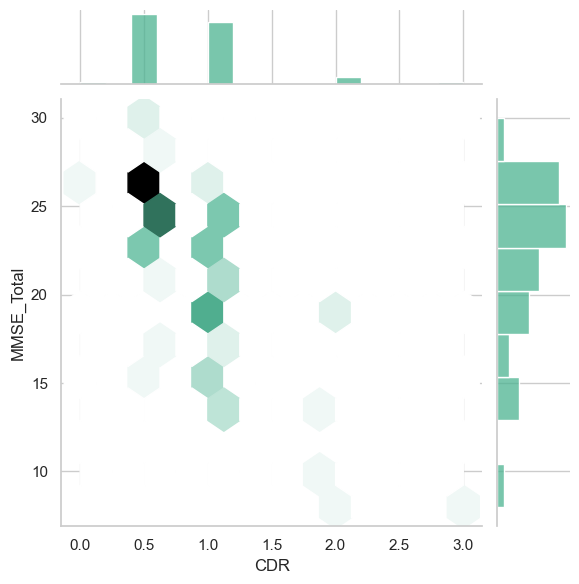

In [161]:
sns.jointplot(x=origin_CG['CDR'], y=origin_CG['MMSE_Total'], kind="hex", color="#4CB391")

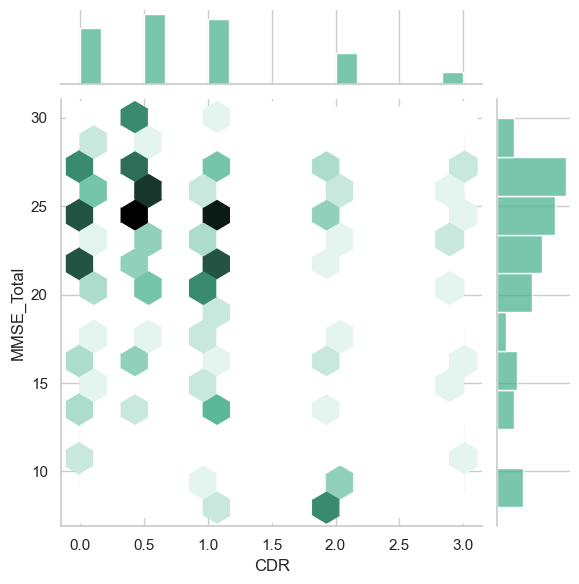

In [170]:
sns.jointplot(x=gen_CG['CDR'], y=gen_CG['MMSE_Total'], kind="hex", color="#4CB391")

In [115]:
origin_CG = df[['GDS', 'MMSE_Total']]
gen_CG = df_gen[['GDS', 'MMSE_Total']]

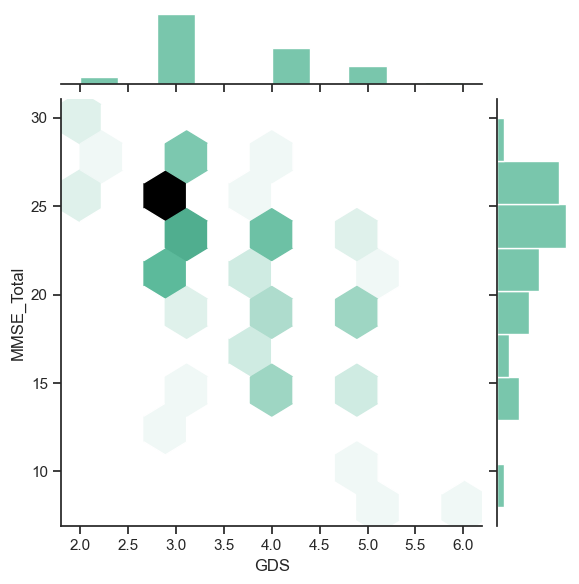

In [116]:
sns.jointplot(x=origin_CG['GDS'], y=origin_CG['MMSE_Total'], kind="hex", color="#4CB391")

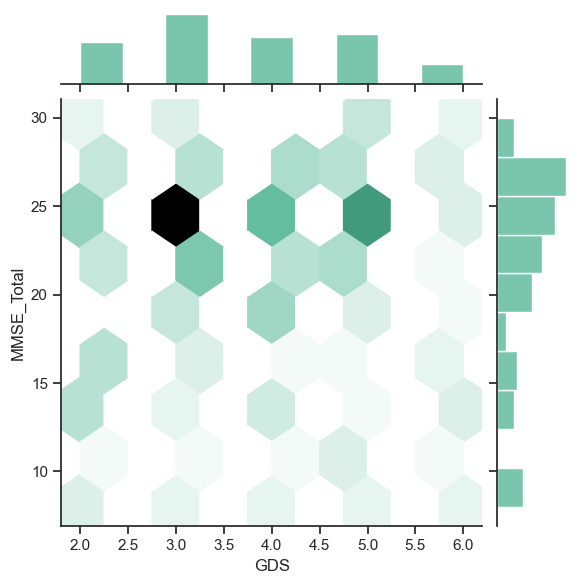

In [119]:
sns.jointplot(x=gen_CG['GDS'], y=gen_CG['MMSE_Total'], kind="hex", color="#4CB391")

In [174]:
origin_CG = df[['CDR', 'Avg_SNSB']]
gen_CG = df_gen[['CDR', 'Avg_SNSB']]

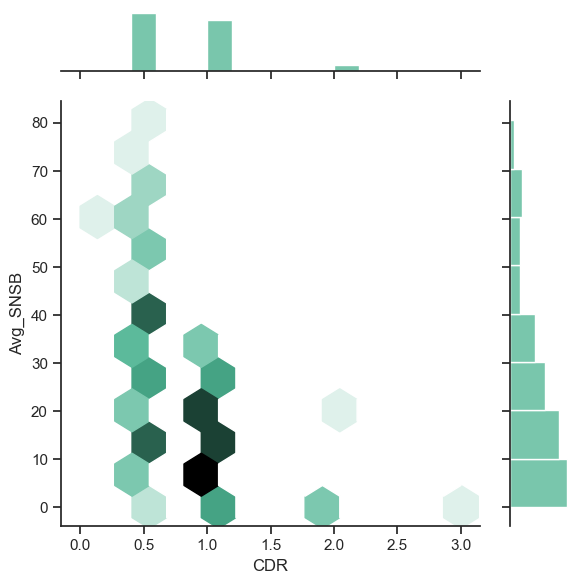

In [182]:
sns.jointplot(x=origin_CG['CDR'], y=origin_CG['Avg_SNSB'], kind="hex", color="#4CB391", space=0.5)

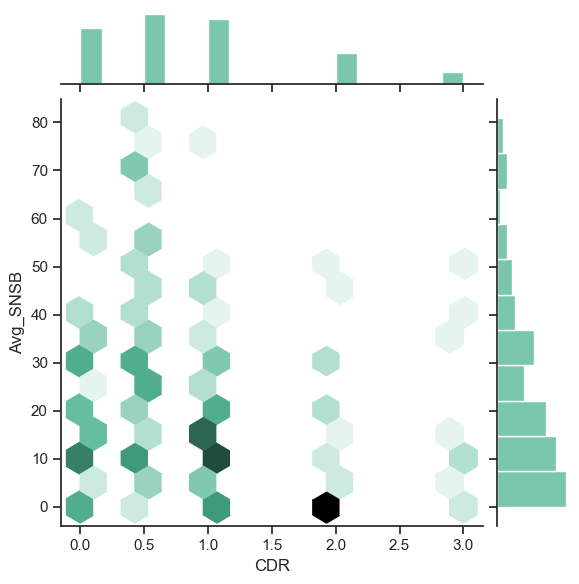

In [183]:
sns.jointplot(x=gen_CG['CDR'], y=gen_CG['Avg_SNSB'], kind="hex", color="#4CB391")

In [184]:
origin_CG = df[['GDS', 'Avg_SNSB']]
gen_CG = df_gen[['GDS', 'Avg_SNSB']]

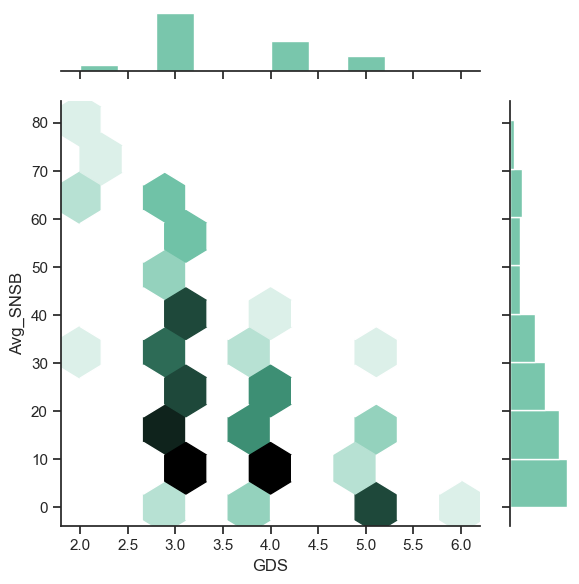

In [185]:
sns.jointplot(x=origin_CG['GDS'], y=origin_CG['Avg_SNSB'], kind="hex", color="#4CB391", space=0.5)

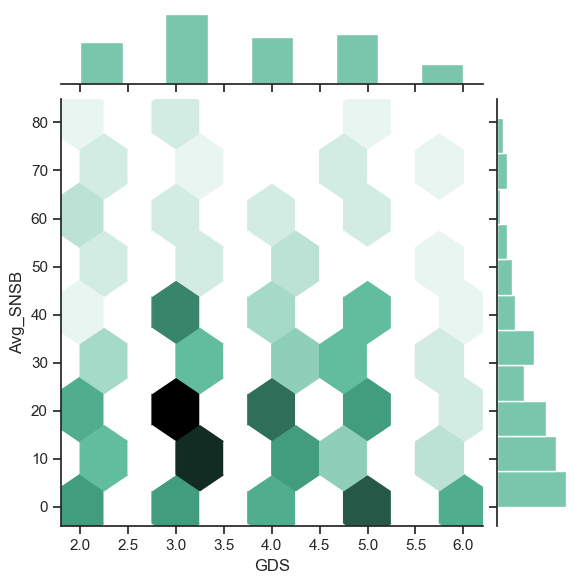

In [186]:
sns.jointplot(x=gen_CG['GDS'], y=gen_CG['Avg_SNSB'], kind="hex", color="#4CB391")